# Credit Card Fraud Detection

In [16]:
#Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandasql as psql

#To ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
#Loading the dataset
creditdata1=pd.read_csv("creditcard.csv",header=0)
#Making a backup copy
creditdata_bk=creditdata1.copy()
#Displaying first 5 rows
creditdata1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
creditdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
creditdata1.shape

(284807, 31)

In [20]:
Q1=psql.sqldf("select * from creditdata1 where Class=1")
Q2=psql.sqldf("select * from creditdata1 where Class=0")

In [21]:
credit_new=creditdata1.groupby("Class",group_keys=False).apply(lambda x:x.sample(frac=0.155))

In [22]:
creditdata=Q1.append(credit_new,ignore_index=True)

In [23]:
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [24]:
creditdata.shape

(44637, 31)

# Data Preprocessing

In [25]:
#Checking for null values
creditdata.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
#Checking for duplicate values
creditdata_dup=creditdata[creditdata.duplicated(keep='last')]
creditdata_dup

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
10,7672.0,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.00,1
20,8757.0,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1
21,8808.0,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10,1
49,20011.0,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31683,167397.0,-3.649078,1.510179,-2.464400,-0.579211,0.395048,-0.155022,0.993242,-0.314511,1.174369,...,0.503675,1.229990,-0.407609,-0.527264,-0.582500,-0.485351,-3.684099,-0.238835,39.47,0
33805,48321.0,1.203301,0.101803,0.540304,0.844813,-0.485169,-0.688190,0.065252,-0.196224,0.316698,...,-0.211872,-0.414283,-0.013019,0.439057,0.481358,0.264786,-0.018859,0.017537,22.14,0
40033,112486.0,-3.691145,-1.524427,-1.610809,1.120405,2.678039,-1.261703,1.400721,-0.642871,0.026793,...,-0.508261,0.844965,1.584811,0.607334,0.283934,-0.632078,-0.368275,0.973898,17.82,0
41601,163152.0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,...,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0


In [27]:
creditdata=creditdata.drop_duplicates()
creditdata.shape

(44506, 31)

In [28]:
#Displaying unique values of each column
creditdata.nunique()

Time      37922
V1        44097
V2        44097
V3        44097
V4        44097
V5        44097
V6        44097
V7        44097
V8        44097
V9        44097
V10       44097
V11       44097
V12       44097
V13       44097
V14       44097
V15       44097
V16       44097
V17       44097
V18       44097
V19       44097
V20       44097
V21       44097
V22       44097
V23       44097
V24       44097
V25       44097
V26       44097
V27       44097
V28       44097
Amount    11832
Class         2
dtype: int64

# Exploratory Data Analysis

In [29]:
#Count the target variable(Class) by 0 or 1 and if their proportion(>=10:1) then it is imbalanced dataset
Target_count=creditdata.Class.value_counts()
print(Target_count)
print("Class 0:",Target_count[0])
print("Class 1:",Target_count[1])
print("Proportion:",round(Target_count[0]/Target_count[1],2),":1")  #Imbalanced dataset
print("Total credit card transactions:",len(creditdata))

0    44033
1      473
Name: Class, dtype: int64
Class 0: 44033
Class 1: 473
Proportion: 93.09 :1
Total credit card transactions: 44506


Text(0, 0.5, 'Frequency')

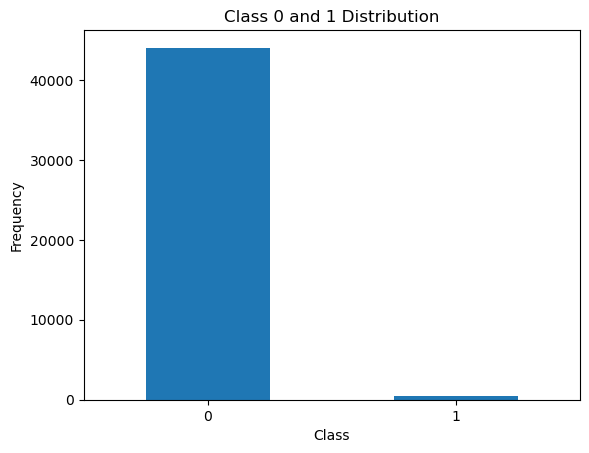

In [30]:
count_classes=pd.value_counts(creditdata['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Class 0 and 1 Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

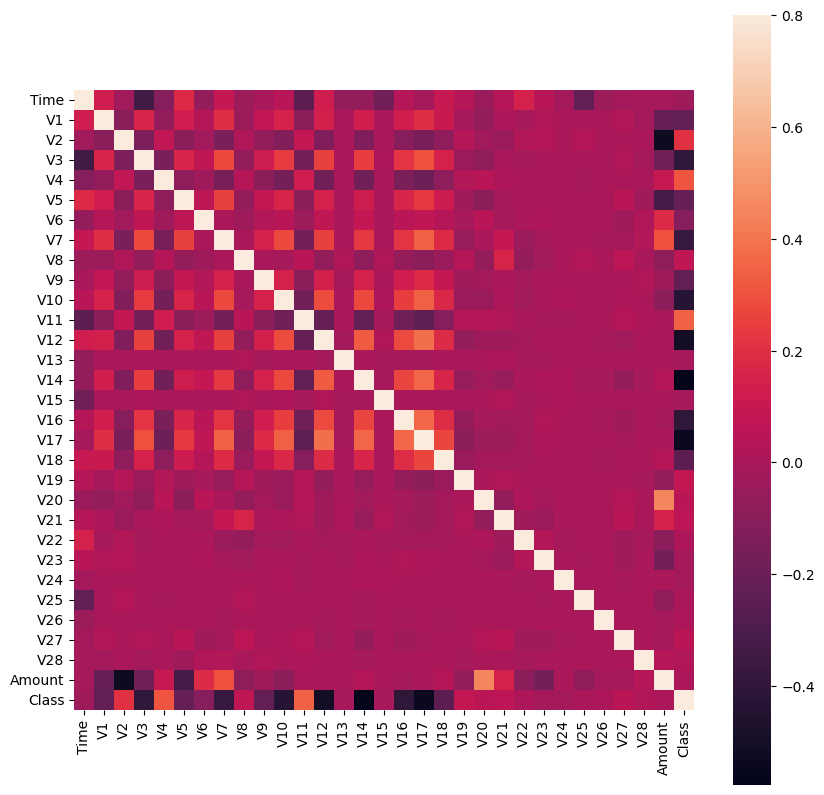

In [31]:
cormat=creditdata.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cormat,vmax=0.8,square=True)
plt.show()

<Axes: xlabel='Time', ylabel='Density'>

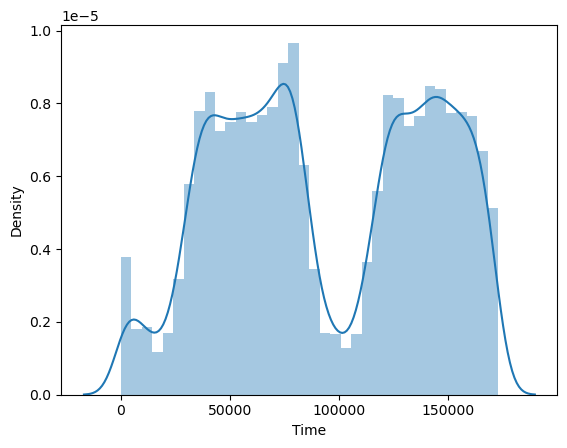

In [32]:
sns.distplot(creditdata['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

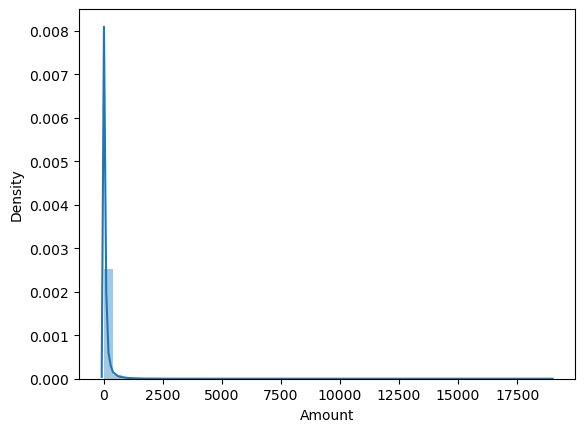

In [33]:
sns.distplot(creditdata['Amount'])

In [34]:
creditdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94666.134331,0.013769,-0.003040,0.007965,-0.009025,0.013260,-0.006495,0.013847,0.000596,0.006167,...,0.000297,-0.004803,-0.000604,-0.005400,-0.004510,0.003177,0.001553,-0.001811,0.000727,87.959506
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# Identifying independent and target variables

In [37]:
#Identifying Indep and Target variables
IndepVar=[]
for col in creditdata.columns:
    if col!='Class':
        IndepVar.append(col)
TargetVar='Class'
x=creditdata[IndepVar]
y=creditdata[TargetVar]

In [38]:
x.shape,y.shape

((44506, 30), (44506,))

# Performing Oversampling

In [39]:
#Performing Randomoversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

oversample=RandomOverSampler(sampling_strategy=0.125)
x_over,y_over=oversample.fit_resample(x,y)

In [40]:
x_over.shape,y_over.shape

((49537, 30), (49537,))

In [42]:
Target_count2=y_over.value_counts()
print(Target_count)
print("Class 0:",Target_count2[0])
print("Class 1:",Target_count2[1])
print("Proportion:",round(Target_count2[0]/Target_count2[1],2),":1") #Dataset is balanced

0    44033
1      473
Name: Class, dtype: int64
Class 0: 44033
Class 1: 5504
Proportion: 8.0 :1


# Splitting train and test data

In [43]:
#Splitting the data into test and train datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34675, 30), (14862, 30), (34675,), (14862,))

# Normalization

In [44]:
#Performing scaling(Normalization)
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [47]:
#Displaying train data
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.242143,0.972610,0.728859,0.884678,0.191902,0.437500,0.526355,0.623603,0.783522,0.505640,...,0.342664,0.548958,0.383141,0.549750,0.403619,0.539335,0.532486,0.481209,0.342764,1.322052e-04
1,0.244053,0.916456,0.733304,0.918775,0.146224,0.446550,0.528668,0.633234,0.785385,0.493417,...,0.349117,0.561263,0.458889,0.546083,0.429577,0.509492,0.310658,0.484086,0.347440,3.067160e-03
2,0.053772,0.802561,0.726291,0.909406,0.239669,0.456480,0.538222,0.618870,0.780957,0.705522,...,0.319673,0.553767,0.482647,0.581594,0.436867,0.596773,0.506627,0.548593,0.310051,5.288207e-07
3,0.439051,0.968364,0.729165,0.895481,0.226117,0.436390,0.535461,0.620796,0.785523,0.592338,...,0.349881,0.558239,0.438208,0.545132,0.340937,0.543724,0.573106,0.481266,0.343460,2.377049e-03
4,0.709596,0.883340,0.645953,0.769121,0.288342,0.409549,0.544225,0.667891,0.777582,0.625109,...,0.418149,0.581538,0.424156,0.507670,0.502917,0.505293,0.281823,0.465501,0.356083,1.124204e-01


In [48]:
#Displaying test data
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.524649,0.914337,0.580834,0.928997,0.333691,0.619118,0.454984,0.648618,0.698784,0.685311,...,0.600950,0.486658,0.521695,0.602633,0.382771,0.473454,0.403465,0.629604,0.351632,0.032445
1,0.000608,0.968483,0.565645,0.891196,0.249558,0.621331,0.384838,0.664340,0.716247,0.607166,...,0.615443,0.458870,0.543112,0.621830,0.487986,0.763681,0.195410,0.592744,0.341524,0.001793
2,0.313318,0.940849,0.522519,0.920256,0.387425,0.589052,0.472176,0.653908,0.721784,0.585204,...,0.633013,0.452627,0.481947,0.613550,0.425187,0.692066,0.267325,0.594230,0.346338,0.101895
3,0.190601,0.962168,0.557369,0.933377,0.366159,0.608252,0.463849,0.648297,0.725668,0.627941,...,0.615035,0.453577,0.519853,0.627062,0.449338,0.696892,0.422072,0.593888,0.341699,0.004616
4,0.111984,0.967025,0.562492,0.915439,0.270830,0.615269,0.418784,0.653794,0.718599,0.698489,...,0.614204,0.453296,0.521506,0.626392,0.412890,0.718884,0.178770,0.596172,0.342184,0.002415


# KNN Algorithm

In [49]:
#load the dataset for KNN

KNN_Results=pd.read_csv(r"C:\Users\PUJITHA\Downloads\KNN_Results (1).csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1449   200]
 [   37 13176]]
Outcome values : 
 1449 200 37 13176
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.92      1649
           0       0.99      1.00      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.98      0.94      0.96     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.4 %
Precision : 97.5 %
Recall : 87.9 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 93.8 %
MCC : 0
roc_auc_score: 0.938


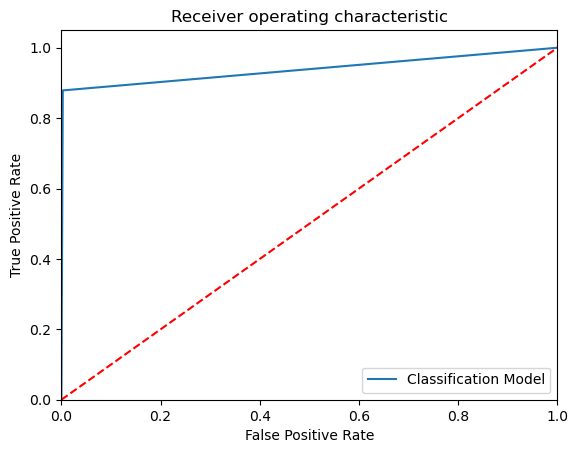

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1449   200]
 [   37 13176]]
Outcome values : 
 1449 200 37 13176
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.92      1649
           0       0.99      1.00      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.98      0.94      0.96     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.4 %
Precision : 97.5 %
Recall : 87.9 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 93.8 %
MCC : 0
roc_auc_score: 0.938


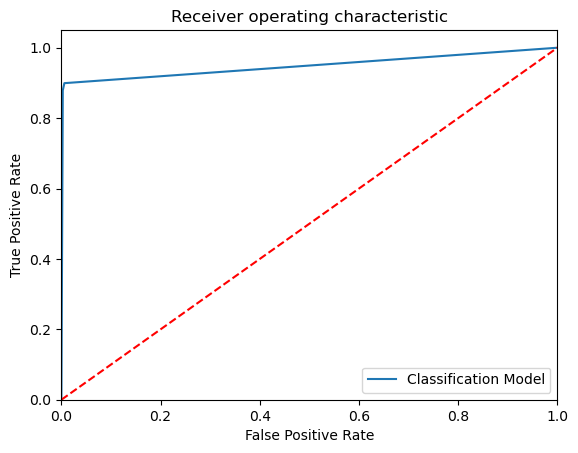

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1483   166]
 [   79 13134]]
Outcome values : 
 1483 166 79 13134
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.92      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.97      0.95      0.96     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.4 %
Precision : 94.9 %
Recall : 89.9 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 94.6 %
MCC : 0
roc_auc_score: 0.947


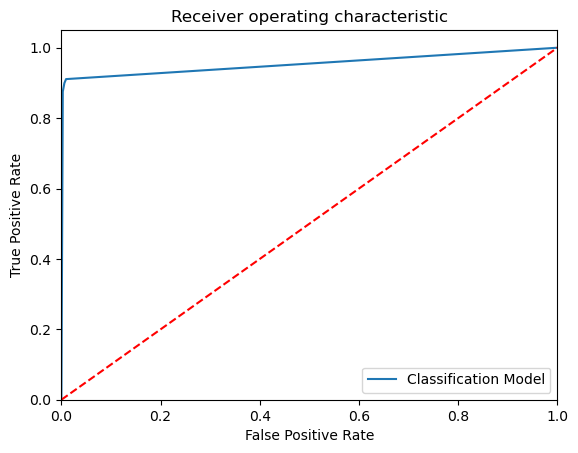

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1477   172]
 [   79 13134]]
Outcome values : 
 1477 172 79 13134
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.92      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.97      0.94      0.96     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.3 %
Precision : 94.9 %
Recall : 89.6 %
F1 Score : 0.922
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 94.5 %
MCC : 0
roc_auc_score: 0.945


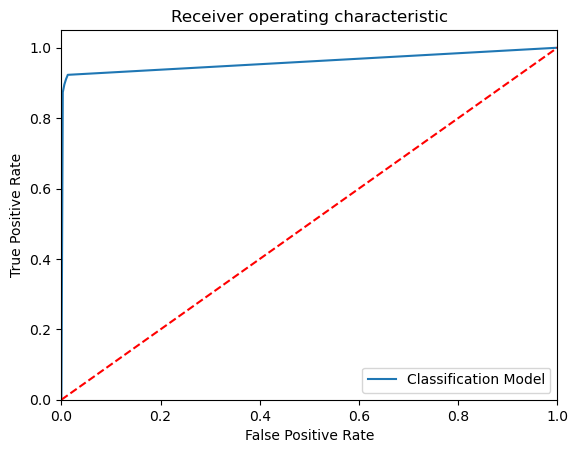

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1496   153]
 [  124 13089]]
Outcome values : 
 1496 153 124 13089
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.91      0.92      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.1 %
Precision : 92.3 %
Recall : 90.7 %
F1 Score : 0.915
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 94.9 %
MCC : 0
roc_auc_score: 0.949


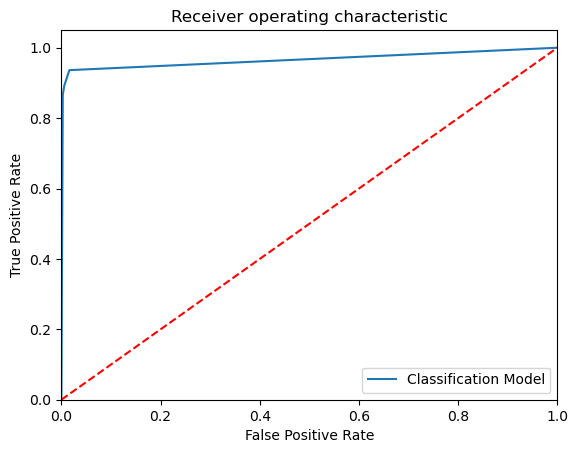

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1492   157]
 [  124 13089]]
Outcome values : 
 1492 157 124 13089
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.1 %
Precision : 92.3 %
Recall : 90.5 %
F1 Score : 0.914
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 94.8 %
MCC : 0
roc_auc_score: 0.948


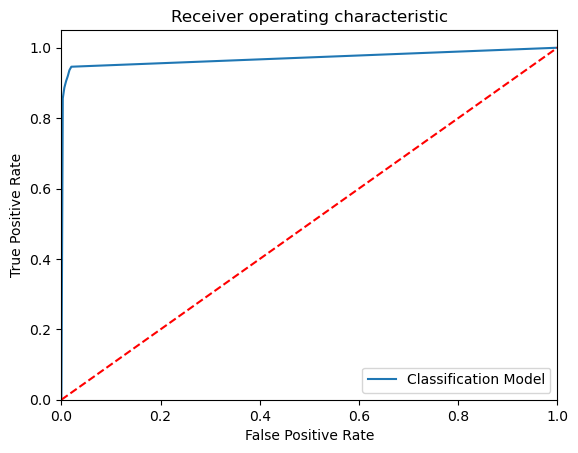

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1512   137]
 [  170 13043]]
Outcome values : 
 1512 137 170 13043
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.92      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.94      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 97.9 %
Precision : 89.9 %
Recall : 91.7 %
F1 Score : 0.908
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 95.2 %
MCC : 0
roc_auc_score: 0.952


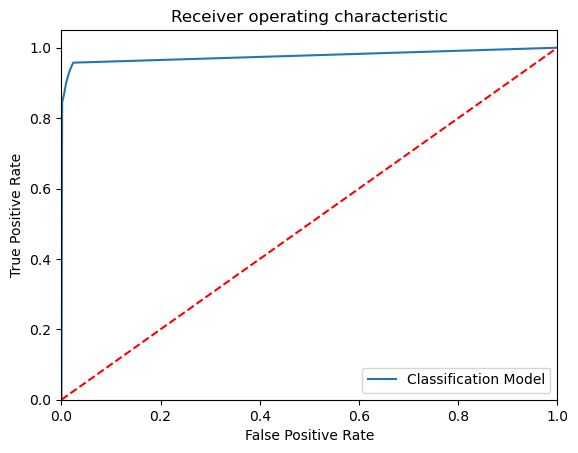

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1501   148]
 [  167 13046]]
Outcome values : 
 1501 148 167 13046
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.91      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.94      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 97.9 %
Precision : 90.0 %
Recall : 91.0 %
F1 Score : 0.905
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 94.8 %
MCC : 0
roc_auc_score: 0.949


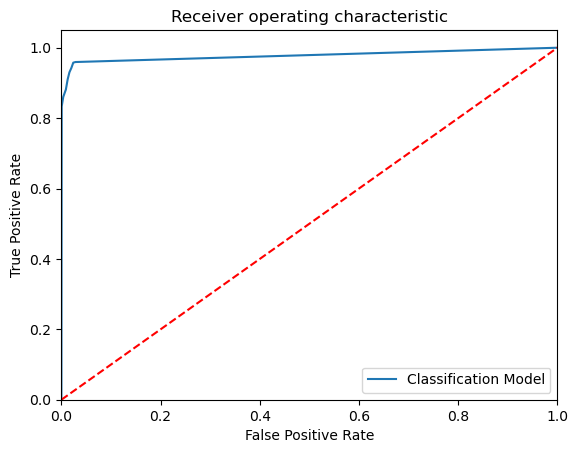

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1523   126]
 [  210 13003]]
Outcome values : 
 1523 126 210 13003
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.92      0.90      1649
           0       0.99      0.98      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.93      0.95      0.94     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 97.7 %
Precision : 87.9 %
Recall : 92.4 %
F1 Score : 0.901
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 95.4 %
MCC : 0
roc_auc_score: 0.954


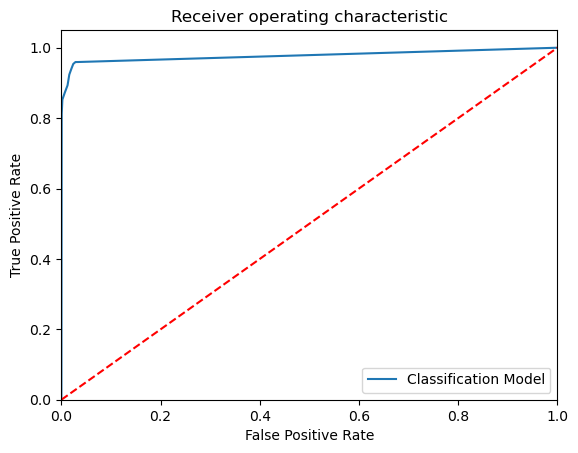

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1494   155]
 [  207 13006]]
Outcome values : 
 1494 155 207 13006
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.91      0.89      1649
           0       0.99      0.98      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.93      0.95      0.94     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 97.6 %
Precision : 87.8 %
Recall : 90.6 %
F1 Score : 0.892
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.5 %
MCC : 0
roc_auc_score: 0.945


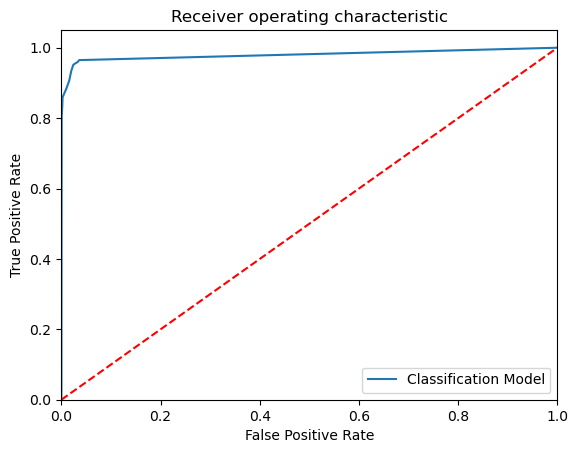

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1510   139]
 [  255 12958]]
Outcome values : 
 1510 139 255 12958
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.92      0.88      1649
           0       0.99      0.98      0.99     13213

    accuracy                           0.97     14862
   macro avg       0.92      0.95      0.93     14862
weighted avg       0.97      0.97      0.97     14862

Accuracy : 97.3 %
Precision : 85.6 %
Recall : 91.6 %
F1 Score : 0.885
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 94.8 %
MCC : 0
roc_auc_score: 0.948


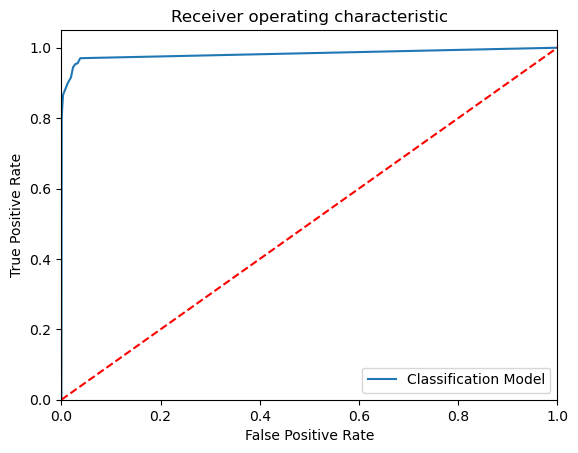

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1499   150]
 [  216 12997]]
Outcome values : 
 1499 150 216 12997
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.91      0.89      1649
           0       0.99      0.98      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.93      0.95      0.94     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 97.5 %
Precision : 87.4 %
Recall : 90.9 %
F1 Score : 0.891
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.6 %
MCC : 0
roc_auc_score: 0.946


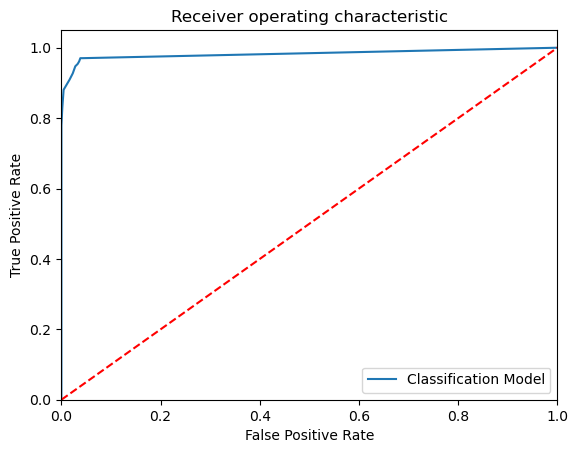

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1514   135]
 [  256 12957]]
Outcome values : 
 1514 135 256 12957
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.92      0.89      1649
           0       0.99      0.98      0.99     13213

    accuracy                           0.97     14862
   macro avg       0.92      0.95      0.94     14862
weighted avg       0.97      0.97      0.97     14862

Accuracy : 97.4 %
Precision : 85.5 %
Recall : 91.8 %
F1 Score : 0.886
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 95.0 %
MCC : 0
roc_auc_score: 0.949


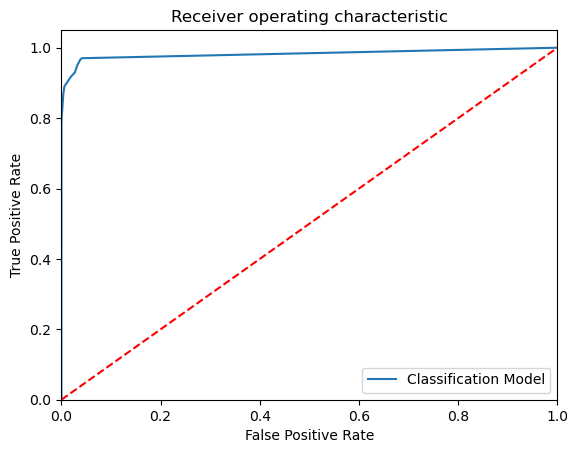

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1483   166]
 [   97 13116]]
Outcome values : 
 1483 166 97 13116
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.90      0.92      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.2 %
Precision : 93.9 %
Recall : 89.9 %
F1 Score : 0.919
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 94.6 %
MCC : 0
roc_auc_score: 0.946


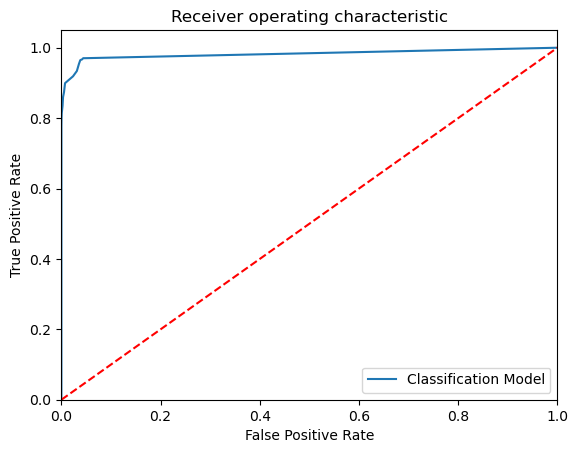

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1484   165]
 [  115 13098]]
Outcome values : 
 1484 165 115 13098
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.90      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.95      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.1 %
Precision : 92.8 %
Recall : 90.0 %
F1 Score : 0.914
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 94.6 %
MCC : 0
roc_auc_score: 0.946


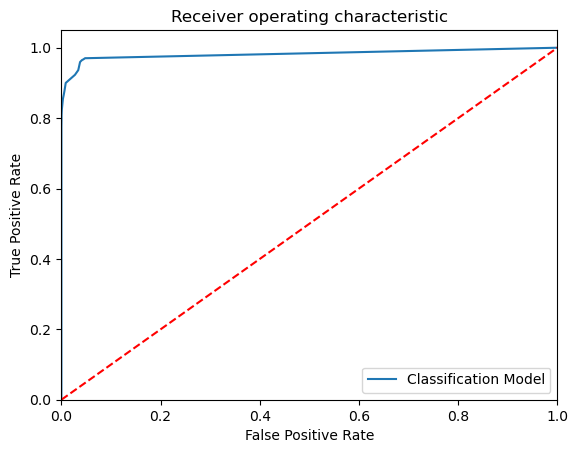

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1448   201]
 [   99 13114]]
Outcome values : 
 1448 201 99 13114
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.88      0.91      1649
           0       0.98      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.94      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.0 %
Precision : 93.6 %
Recall : 87.8 %
F1 Score : 0.906
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 93.6 %
MCC : 0
roc_auc_score: 0.935


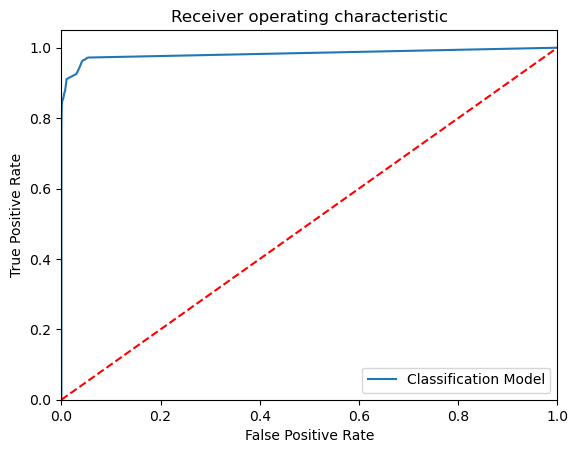

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1466   183]
 [  118 13095]]
Outcome values : 
 1466 183 118 13095
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.89      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.94      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.0 %
Precision : 92.6 %
Recall : 88.9 %
F1 Score : 0.907
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 94.0 %
MCC : 0
roc_auc_score: 0.94


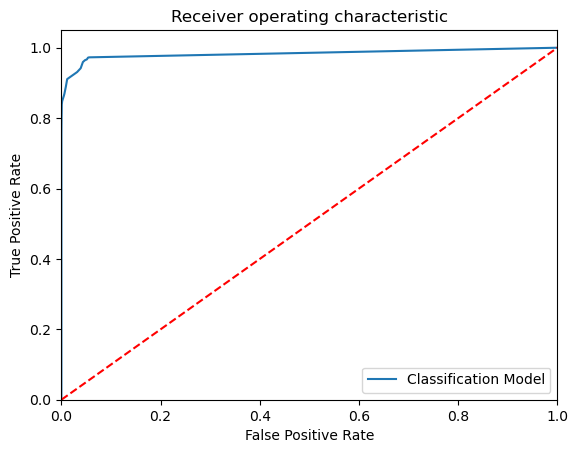

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1452   197]
 [   95 13118]]
Outcome values : 
 1452 197 95 13118
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.88      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.94      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.0 %
Precision : 93.9 %
Recall : 88.1 %
F1 Score : 0.909
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 93.7 %
MCC : 0
roc_auc_score: 0.937


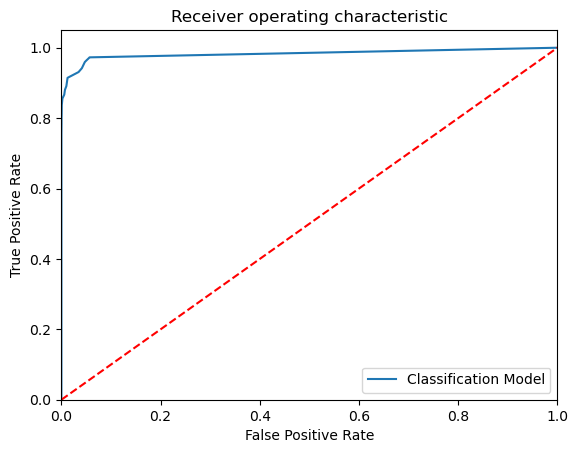

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1456   193]
 [  107 13106]]
Outcome values : 
 1456 193 107 13106
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.88      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.94      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.0 %
Precision : 93.2 %
Recall : 88.3 %
F1 Score : 0.907
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 93.8 %
MCC : 0
roc_auc_score: 0.937


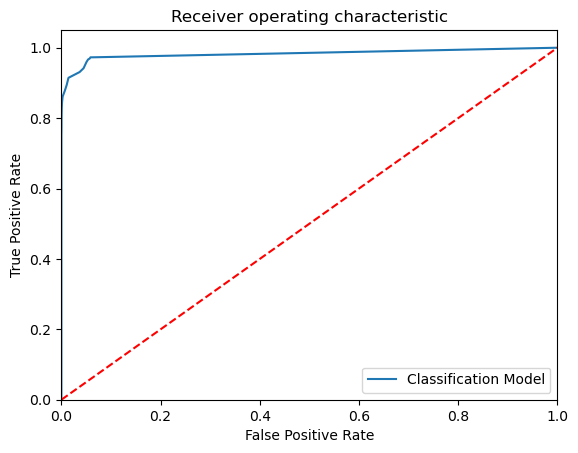

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1451   198]
 [  102 13111]]
Outcome values : 
 1451 198 102 13111
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.88      0.91      1649
           0       0.99      0.99      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.96      0.94      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.0 %
Precision : 93.4 %
Recall : 88.0 %
F1 Score : 0.906
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 93.6 %
MCC : 0
roc_auc_score: 0.936


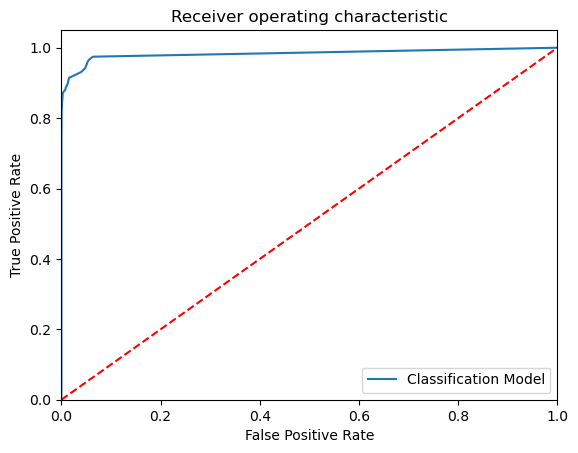

In [50]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []
for a in range(1, 21, 1):
    k = a
    # Build the model
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    print('KNN_K_value = ', a)
    
    # Print the model name
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    actual = y_test
    
    # predicted values
    predicted = y_pred
    
    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    from math import sqrt
    MCC=0
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [51]:
#Displaying KNN Results
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1449,200,37,13176,0.984,0.975,0.879,0.924,0.997,0,0.937957,0.938
1,KNeighborsClassifier(n_neighbors=2),2,1449,200,37,13176,0.984,0.975,0.879,0.924,0.997,0,0.937957,0.938
2,KNeighborsClassifier(n_neighbors=3),3,1483,166,79,13134,0.984,0.949,0.899,0.924,0.994,0,0.946677,0.946
3,KNeighborsClassifier(n_neighbors=4),4,1477,172,79,13134,0.983,0.949,0.896,0.922,0.994,0,0.944858,0.945
4,KNeighborsClassifier(),5,1496,153,124,13089,0.981,0.923,0.907,0.915,0.991,0,0.948916,0.949
5,KNeighborsClassifier(n_neighbors=6),6,1492,157,124,13089,0.981,0.923,0.905,0.914,0.991,0,0.947703,0.948
6,KNeighborsClassifier(n_neighbors=7),7,1512,137,170,13043,0.979,0.899,0.917,0.908,0.987,0,0.952027,0.952
7,KNeighborsClassifier(n_neighbors=8),8,1501,148,167,13046,0.979,0.900,0.910,0.905,0.987,0,0.948805,0.948
8,KNeighborsClassifier(n_neighbors=9),9,1523,126,210,13003,0.977,0.879,0.924,0.901,0.984,0,0.953848,0.954
9,KNeighborsClassifier(n_neighbors=10),10,1494,155,207,13006,0.976,0.878,0.906,0.892,0.984,0,0.945169,0.945


In [52]:
#Load dataset for all  algorithms
EMResults=pd.read_csv(r"C:\Users\PUJITHA\Downloads\EMResults (1).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Building Classification algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1393   256]
 [   14 13199]]
Outcome values : 
 1393 256 14 13199
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.84      0.91      1649
           0       0.98      1.00      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.99      0.92      0.95     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.2 %
Precision : 99.0 %
Recall : 84.5 %
F1 Score : 0.912
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 92.2 %
MCC : 0
roc_auc_score: 0.922


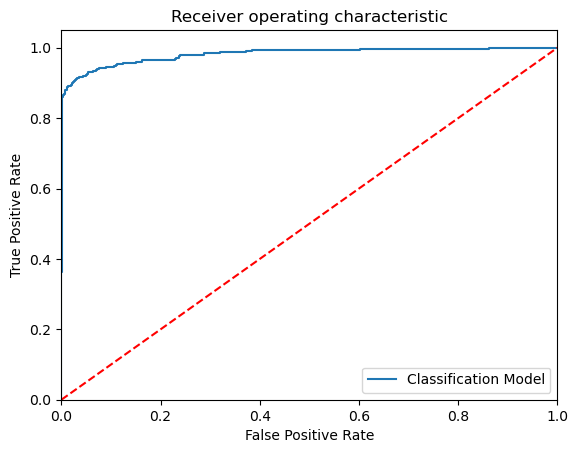

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1105   544]
 [  516 12697]]
Outcome values : 
 1105 544 516 12697
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.67      0.68      1649
           0       0.96      0.96      0.96     13213

    accuracy                           0.93     14862
   macro avg       0.82      0.82      0.82     14862
weighted avg       0.93      0.93      0.93     14862

Accuracy : 92.9 %
Precision : 68.2 %
Recall : 67.0 %
F1 Score : 0.676
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 81.6 %
MCC : 0
roc_auc_score: 0.816


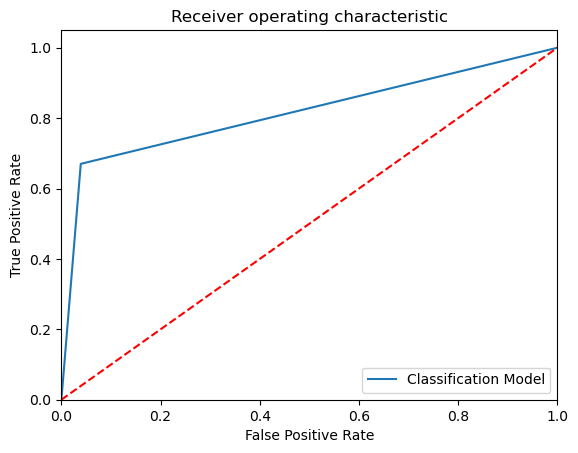

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1284   365]
 [    4 13209]]
Outcome values : 
 1284 365 4 13209
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.78      0.87      1649
           0       0.97      1.00      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.99      0.89      0.93     14862
weighted avg       0.98      0.98      0.97     14862

Accuracy : 97.5 %
Precision : 99.7 %
Recall : 77.9 %
F1 Score : 0.874
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 89.0 %
MCC : 0
roc_auc_score: 0.889


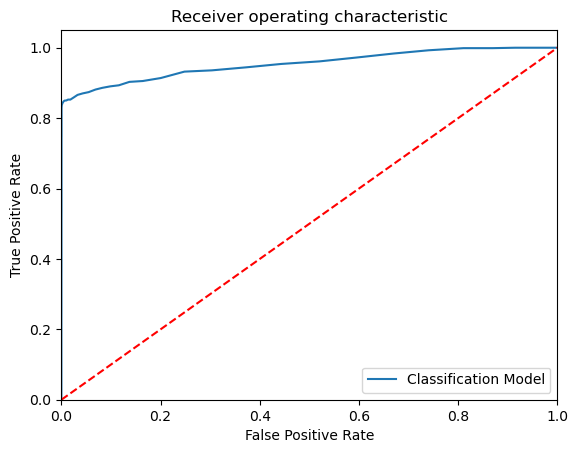

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1226   423]
 [    3 13210]]
Outcome values : 
 1226 423 3 13210
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.74      0.85      1649
           0       0.97      1.00      0.98     13213

    accuracy                           0.97     14862
   macro avg       0.98      0.87      0.92     14862
weighted avg       0.97      0.97      0.97     14862

Accuracy : 97.1 %
Precision : 99.8 %
Recall : 74.3 %
F1 Score : 0.852
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 87.1 %
MCC : 0
roc_auc_score: 0.872


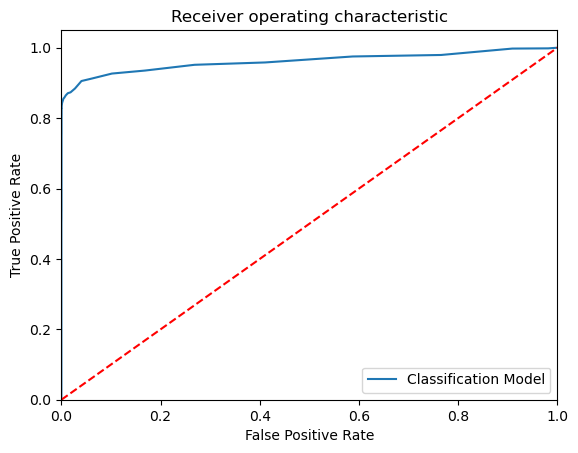

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1449   200]
 [   37 13176]]
Outcome values : 
 1449 200 37 13176
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.92      1649
           0       0.99      1.00      0.99     13213

    accuracy                           0.98     14862
   macro avg       0.98      0.94      0.96     14862
weighted avg       0.98      0.98      0.98     14862

Accuracy : 98.4 %
Precision : 97.5 %
Recall : 87.9 %
F1 Score : 0.924
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 93.8 %
MCC : 0
roc_auc_score: 0.938


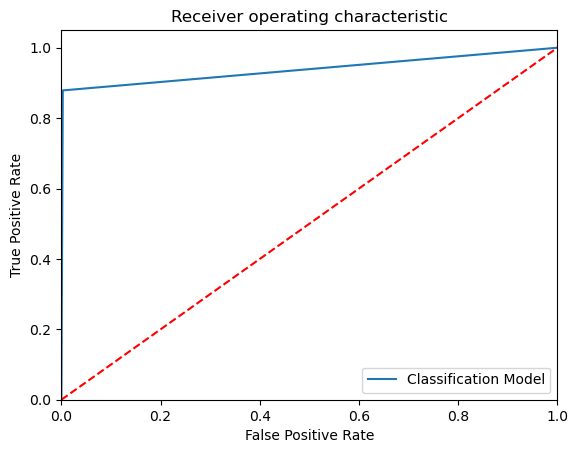

-----------------------------------------------------------------------------------------------------


In [54]:
# Build the Classification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create objects of classification algorithms with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)

# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN,]
for models in MM:
            
    # Train the model training dataset
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    print('Model Name: ', models)
    
    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values
    actual = y_test

    # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    from math import sqrt
    MCC=0
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [55]:
#Displaying EMResults data
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1393,256,14,13199,0.982,0.990,0.845,0.912,0.999,0,0.921847,0.922
1,DecisionTreeClassifier(),1141,508,1980,11233,0.833,0.366,0.692,0.478,0.850,0,0.771041,0.771
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1194,455,4,13209,0.969,0.997,0.724,0.839,1.000,0,0.861886,0.862
3,"(ExtraTreeClassifier(random_state=12290490), E...",1176,473,4,13209,0.968,0.997,0.713,0.831,1.000,0,0.856428,0.856
4,KNeighborsClassifier(),1496,153,124,13089,0.981,0.923,0.907,0.915,0.991,0,0.948916,0.949


# KNN Algorithm

In [56]:
#Predicting target variable(fraud) by applying test data
y_predKNN=ModelKNN.predict(x_test)

In [60]:
Results = pd.DataFrame({'fraud_A':y_test, 'fraud_P':y_predKNN})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = creditdata.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,fraud_A,fraud_P
32321,140217.0,1.901608,-0.319896,-0.296786,1.190715,-0.502346,0.018090,-0.641814,0.248811,0.961145,...,0.336656,-0.519203,-0.442270,-0.928594,0.043461,-0.040613,15.00,0,0,0
19387,80710.0,-1.793005,1.803075,1.036033,0.577406,-0.277395,-0.032672,0.191458,0.554613,-0.524251,...,-0.214649,-0.463482,0.395965,-0.469007,-0.212212,-0.137644,37.40,0,0,0
26464,71622.0,1.487777,-1.161515,0.278716,-1.285882,-1.229675,-0.034608,-1.087744,0.018247,-1.374553,...,0.020249,-0.458938,0.418637,-0.180249,0.051036,0.008946,14.40,0,0,0
44266,84632.0,-3.616374,2.220509,0.558121,0.002248,-0.388309,-0.145765,0.689782,0.257052,1.223925,...,-0.359650,0.051076,0.704274,-0.623471,-1.982807,-1.163195,28.06,0,0,0
8344,60235.0,-0.832359,1.178985,1.679105,-0.171066,0.400718,-0.451902,1.033426,-0.112516,-0.538996,...,-0.392785,-0.167998,0.613561,-0.503267,-0.091068,0.057043,22.49,0,0,0
316,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1,1,1
8249,163195.0,-0.221595,1.130345,-0.924894,-0.684973,0.710156,-0.385482,0.448314,0.548759,-0.281717,...,0.122602,0.144073,-0.415602,0.122673,0.083266,0.005676,9.72,0,0,0
40243,32199.0,1.160957,1.265621,-1.576473,1.472988,1.162173,-1.013532,0.658133,-0.152624,-0.847326,...,-0.203189,-0.282172,0.785278,-0.284958,0.058399,0.085436,1.79,0,0,0
8194,133866.0,-0.092550,0.454133,-0.175684,-2.630380,1.123583,-1.159796,1.576277,-0.565313,0.757781,...,-0.396121,0.633217,0.284377,-0.203263,-0.067231,-0.084781,9.99,0,0,0
2464,29161.0,1.262389,-0.055306,0.730788,0.021207,-1.007650,-1.234697,-0.243900,-0.152728,0.466887,...,0.145727,0.744590,0.053195,0.886948,-0.073995,0.011066,0.77,0,0,0
